In [ ]:
# https://stackoverflow.com/questions/26681756/how-to-convert-a-python-numpy-array-to-an-rgb-image-with-opencv-2-4
# https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9
# https://medium.com/@florestony5454/median-filtering-with-python-and-opencv-2bce390be0d1
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python
# https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
# https://stackoverflow.com/questions/7762948/how-to-convert-an-rgb-image-to-numpy-array
# https://techtutorialsx.com/2018/06/02/python-opencv-converting-an-image-to-gray-scale
# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv
# https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise
# https://stackoverflow.com/questions/35192550/wiener-filter-for-image-deblur
# https://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.wiener

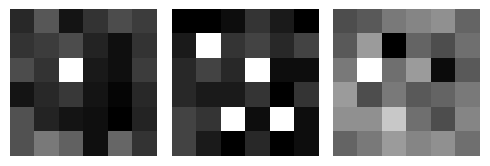

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage import restoration

img_arr1 = np.array([[8,  17, 4,  10, 15, 12],
                   [10, 12, 15, 7,  3,  10],
                   [15, 10, 50, 5,  3,  12],
                   [4,  8,  11,  4,  1,  8],
                   [16,  7,  4,  3,  0,  7],
                   [16, 24, 19, 3,  20, 10]], dtype=np.uint8)

img_arr2 = np.array([[1,  1,  2,  5,  3,  1],
                   [3,  20, 5,  6,  4,  6],
                   [4,  6,  4,  20, 2,  2],
                   [4,  3,  3,  5,  1,  5],
                   [6,  5,  20, 2,  20, 2],
                   [6,  3,  1,  4,  1,  2]], dtype=np.uint8)

img_arr3 = np.array([[7,  8,  11, 12, 13,  9],
                   [8,  14, 0,  9,  7,  10],
                   [11, 23, 10, 14, 1,   8],
                   [14, 7,  11, 8,  9,  11],
                   [13, 13, 18, 10, 7,  12],
                   [9,  11, 14, 12, 13, 10]], dtype=np.uint8)

plt.figure(figsize=(5, 5))
plt.subplot(131)
plt.imshow(img_arr1, cmap='gray')
plt.axis("off")
plt.subplot(132)
plt.imshow(img_arr2, cmap='gray')
plt.axis("off")
plt.subplot(133)
plt.imshow(img_arr3, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

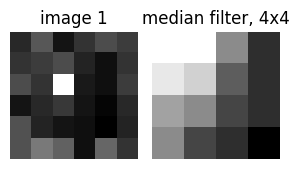

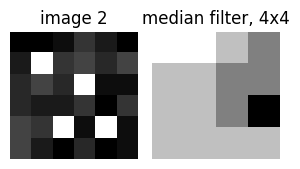

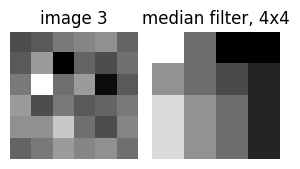

In [ ]:
def show_median_plot(num: int, img: np.ndarray):
    img_med = cv2.medianBlur(img[1:5, 1:5], 3) # get the 4x4 section in the middle

    plt.figure(figsize=(3, 3))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title(f"image {num}")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(img_med, cmap='gray')
    plt.title(f"median filter, 4x4")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

show_median_plot(1, img_arr1)
show_median_plot(2, img_arr2)
show_median_plot(3, img_arr3)

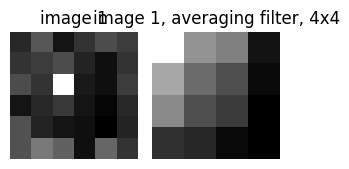

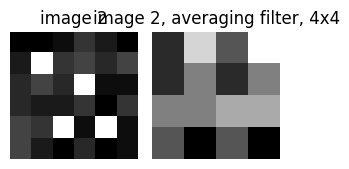

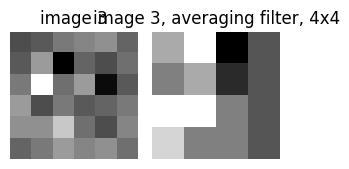

In [ ]:
# Using the same images from 1, transform them using 3 x 3 averaging filter.
def show_average_plot(num: int, img: np.ndarray):
    kernel = np.ones((3, 3), np.uint8) / 9
    img_avg = cv2.filter2D(img[1:5, 1:5], -1, kernel)

    plt.figure(figsize=(3, 3))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title(f"image {num}")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(img_avg, cmap='gray')
    plt.title(f"image {num}, averaging filter, 4x4")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

show_average_plot(1, img_arr1)
show_average_plot(2, img_arr2)
show_average_plot(3, img_arr3)

In [ ]:
# compare the results from 1 and 2

# they're almost the same with slight differences. i think the difference that
# contrasts the most is on the second image, where the median and averaged ones
# look completely different.

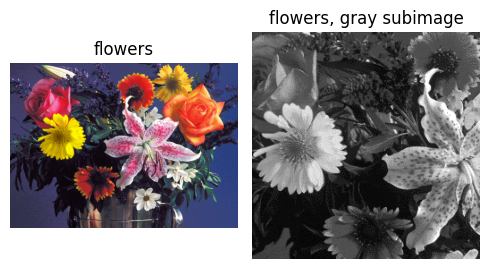

In [ ]:
# Produce a grey subimage of the image flowers.tif by converting using the
# following Matlab commands into Python scripts

flowers = plt.imread("flowers.tif")
flowers_gray = cv2.cvtColor(flowers, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(flowers, cmap='gray')
plt.title("flowers")
plt.axis("off")
plt.subplot(122)
plt.imshow(flowers_gray[30:285, 60:315], cmap='gray')
plt.title("flowers, gray subimage")
plt.axis("off")
plt.tight_layout()
plt.show()

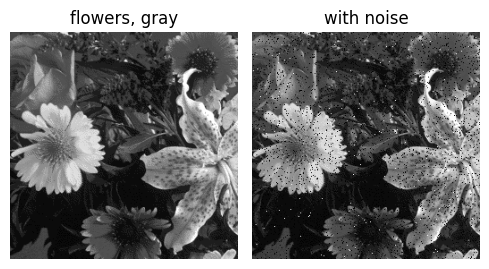

In [ ]:
# Then add 5% ‘salt & pepper’ noise to the greyscale image.

fg_noised = random_noise(flowers_gray[30:285, 60:315], mode="s&p", salt_vs_pepper=0.05)
fg_noised = (255*fg_noised).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(flowers_gray[30:285, 60:315], cmap='gray')
plt.title("flowers, gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(fg_noised, cmap='gray')
plt.title("with noise")
plt.axis("off")
plt.tight_layout()
plt.show()

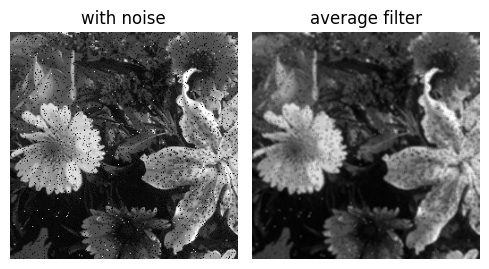

In [ ]:
# a) average filtering
kernel = np.ones((3, 3), np.uint8) / 9
fg_noised_avg = cv2.filter2D(fg_noised, -1, kernel)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(fg_noised, cmap='gray')
plt.title("with noise")
plt.axis("off")
plt.subplot(122)
plt.imshow(fg_noised_avg, cmap='gray')
plt.title("average filter")
plt.axis("off")
plt.tight_layout()
plt.show()

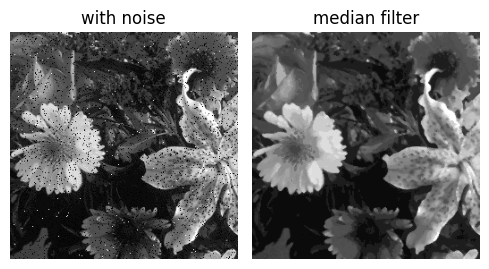

In [ ]:
# b) median filtering
fg_noised_med = cv2.medianBlur(fg_noised, 3)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(fg_noised, cmap='gray')
plt.title("with noise")
plt.axis("off")
plt.subplot(122)
plt.imshow(fg_noised_med, cmap='gray')
plt.title("median filter")
plt.axis("off")
plt.tight_layout()
plt.show()

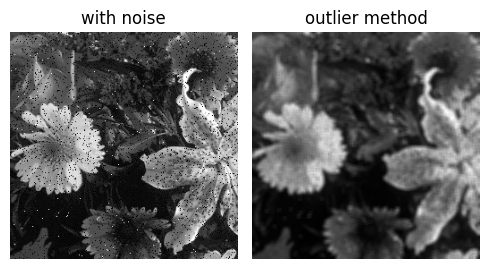

In [ ]:
# c) the outlier method
fg_outlier = cv2.filter2D(fg_noised, -1, np.ones((5, 5), np.uint8)/25)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(fg_noised, cmap='gray')
plt.title("with noise")
plt.axis("off")
plt.subplot(122)
plt.imshow(fg_outlier, cmap='gray')
plt.title("outlier method")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# median filter gives the best result because it is the clearest and the least blurry of the three methods used.

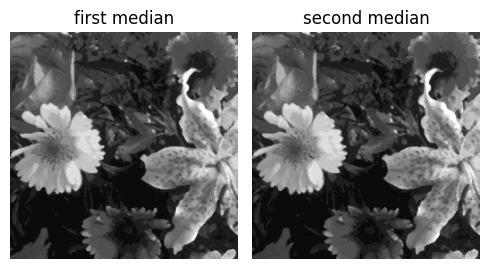

In [ ]:
# 5. Use the grey image from question 4, but with 20% ‘salt & pepper’ noise.
# Compare the results with 5 x 5 median filter, and two applications of a 3 x 3
# median filter. Which of the two produced a better result?
fg_noised2 = (255 * random_noise(
                        flowers_gray[30:285, 60:315],
                        mode="s&p",
                        salt_vs_pepper=0.2)
                        ).astype(np.uint8)

fg_noised_med2 = cv2.medianBlur(fg_noised2, 3)

plt.figure(figsize=(5, 5))
plt.subplot(121)
plt.imshow(fg_noised_med, cmap='gray')
plt.title("first median")
plt.axis("off")
plt.subplot(122)
plt.imshow(fg_noised_med2, cmap='gray')
plt.title("second median")
plt.axis("off")
plt.tight_layout()
plt.show()

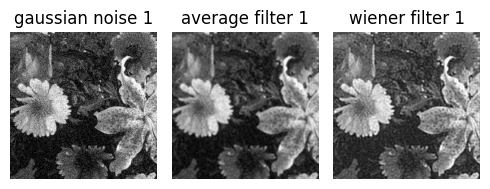

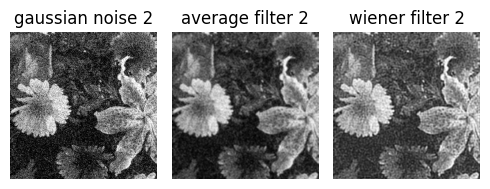

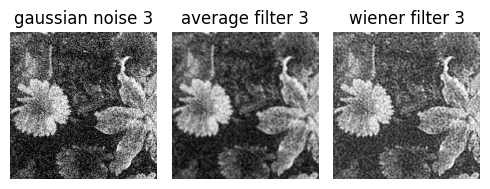

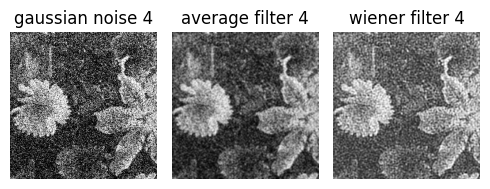

In [ ]:
# 6. Add Gaussian noise to the greyscale flowers image with the following parameters:
# a. mean 0, variance 0.01 (the default)
# b. mean 0, variance 0.02,
# c. mean 0, variance 0.05,
# d. mean 0, variance 0.1,
# In each case, attempt to remove the noise with average filtering and with Wiener
# filtering. Can you produce satisfactory results with the last two noisy images?

gray_img = flowers_gray[30:285, 60:315]

fg1 = random_noise(gray_img, mode="gaussian", mean=0, var=0.01)
fg2 = random_noise(gray_img, mode="gaussian", mean=0, var=0.02)
fg3 = random_noise(gray_img, mode="gaussian", mean=0, var=0.05)
fg4 = random_noise(gray_img, mode="gaussian", mean=0, var=0.1)

def show_plot(num: int, fg: np.ndarray):
    fg_avg = cv2.filter2D(fg, -1, np.ones((3, 3), np.uint8)/9)
    fg_w = restoration.wiener(fg, np.ones((3, 3))/9, 0.1)

    plt.figure(figsize=(5, 5))
    plt.subplot(131)
    plt.imshow(fg, cmap='gray')
    plt.title(f"gaussian noise {num}")
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(fg_avg, cmap='gray')
    plt.title(f"average filter {num}")
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(fg_w, cmap='gray')
    plt.title(f"wiener filter {num}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

show_plot(1, fg1)
show_plot(2, fg2)
show_plot(3, fg3)
show_plot(4, fg4)